# Descubra quem fez o ENEM 2016 apenas para treino.
**Autor**: Diego Luiz.
### Contatos profissionais: 
- **E-mail:** [dluiz815@gmail.com](dluiz815@gmail.com)
- **LinkedIn:** [Perfil](https://www.linkedin.com/in/diego-luiz-ds/)
- **GitHub:** [Perfil](https://github.com/Diegohluiz)

<img src="img/logo-enem-2016.png"/>

 # O Problema:
 Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para **treino**.
 
 O contexto do desafio gira em torno dos resultados do **ENEM 2016** (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado **answer.csv** com duas colunas: `NU_INSCRICAO` e `IN_TREINEIRO`.
 

# Importação das bibliotecas

In [90]:
# Computação científica e manipulação de dados.
import pandas as pd
import numpy as np

# Visualização e Gráficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem de dados e Pré-processamento
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metricas de Avaliação
from sklearn.metrics import (f1_score, confusion_matrix, roc_curve, 
                             roc_auc_score, classification_report)

# Ocultando warnings
import warnings
warnings.filterwarnings('ignore')

# Visualização das árvores
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# Algumas configuraçãoes do Matplotlib
plt.rc("figure", figsize=(10, 6))
sns.set(style="dark", palette="Accent")

# Importandos os dados

In [3]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv").drop(columns="NU_INSCRICAO")

In [4]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
df_test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,43,RS,19,F,1,1,1,3,1,NaN,...,NaN,NaN,E,E,H,B,B,C,D,A
1,15,PA,24,M,3,2,1,4,1,NaN,...,NaN,NaN,B,C,B,A,A,C,D,A
2,29,BA,16,F,2,1,3,0,1,NaN,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,41,PR,17,F,1,1,2,0,2,1.0,...,40.0,480.0,E,E,E,C,B,B,C,A
4,53,DF,19,F,1,1,1,1,1,NaN,...,80.0,720.0,E,E,E,B,B,B,D,A


# Selecionando as Features no Data Frame de Treino.

In [6]:
# Limitando o data frame de treino às features disponíveis nos dados de teste.
features = df_test.columns.to_list()

df_train = df_train[features + ["IN_TREINEIRO"]]

In [7]:
df_train.columns

Index(['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024',
       'Q025', 'Q026', 'Q027', 'Q047', 'IN_TREINEIRO'],
      dtype='object')

# Análise Descritiva dos Dados
## Dados de Treino

In [8]:
df_train.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_TREINEIRO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,4282.000000,13730.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,2.259692,0.001238,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0.129862
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.698586,0.035167,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,0.336163
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,0.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,0.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,0.000000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,1.000000


Na tabela acima, temos um bom overview das variáveis numéricas do nosso conjunto de dados de treino.
Nela, temos várias informações importantes a cerca de cada variável, tais como: média, mediana, desvio padrão, quartis, valores mínimos e máximos.

Uma informação particularmente util, no caso preenchimento de valores faltantes (Values Missing), é a do range(faixa de valores) dos nossos dados.

### Range dos valores dos dados de Treino.

In [9]:
print("Faixa de Valores - Dados de Treino\n")
print(f"Valor mínimo: {df_train.describe().loc['min'].min()}")
print(f"Valor máximo: {df_train.describe().loc['max'].max()}")

Faixa de Valores - Dados de Treino

Valor mínimo: 0.0
Valor máximo: 1000.0


## Dados de Teste.

In [10]:
df_test.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,1426.000000,1426.000000,4570.000000,...,3458.000000,3400.000000,4570.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,31.029322,21.545295,2.176586,1.046827,1.767615,2.172867,1.357987,1.166199,2.286115,0.002188,...,528.615818,516.102471,0.609190,1.090000,118.988824,111.599118,106.130882,112.402941,76.376471,525.498235
std,9.901375,6.790798,0.996656,0.245769,0.871374,3.250585,0.567280,0.546511,0.721239,0.046732,...,73.278207,69.141624,0.487985,0.668384,29.067885,33.150519,33.553963,32.801291,43.295267,151.640060
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,479.525000,469.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,531.200000,521.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,520.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,580.975000,564.825000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,63.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,750.700000,730.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,960.000000


Seguindo o mesmo procedimento que aplicamos aos dado de treino:
### Range dos valores dos dados de Treino.

In [11]:
print("Faixa de Valores - Dados de Teste\n")
print(f"Valor mínimo: {df_train.describe().loc['min'].min()}")
print(f"Valor máximo: {df_train.describe().loc['max'].max()}")

Faixa de Valores - Dados de Teste

Valor mínimo: 0.0
Valor máximo: 1000.0


# Análise Exploratória dos Dados
Vamos começar nossa análise exploratória dos dados de treino e teste definindo uma função para identifarmos os missing values nos dois conjuntos de dados.

In [12]:
def plota_nulos(df, titulo):
    nans = df.isna().sum()
    
    plt.figure(figsize=(15, 16))
    plt.barh(y=nans.index, width=nans.values)
    for indice, valor in enumerate(nans):
        plt.text(valor + 5, indice - 0.25, "{}%".format(round(valor * 100/ df.shape[0], 0)))
    plt.title(titulo, fontsize=25)
    plt.xlabel("Quantidade de Valores Faltantes", fontsize=18)
    plt.ylabel("Features", fontsize=18)
    plt.grid(True)

## Missing Values nos Dados de Teste

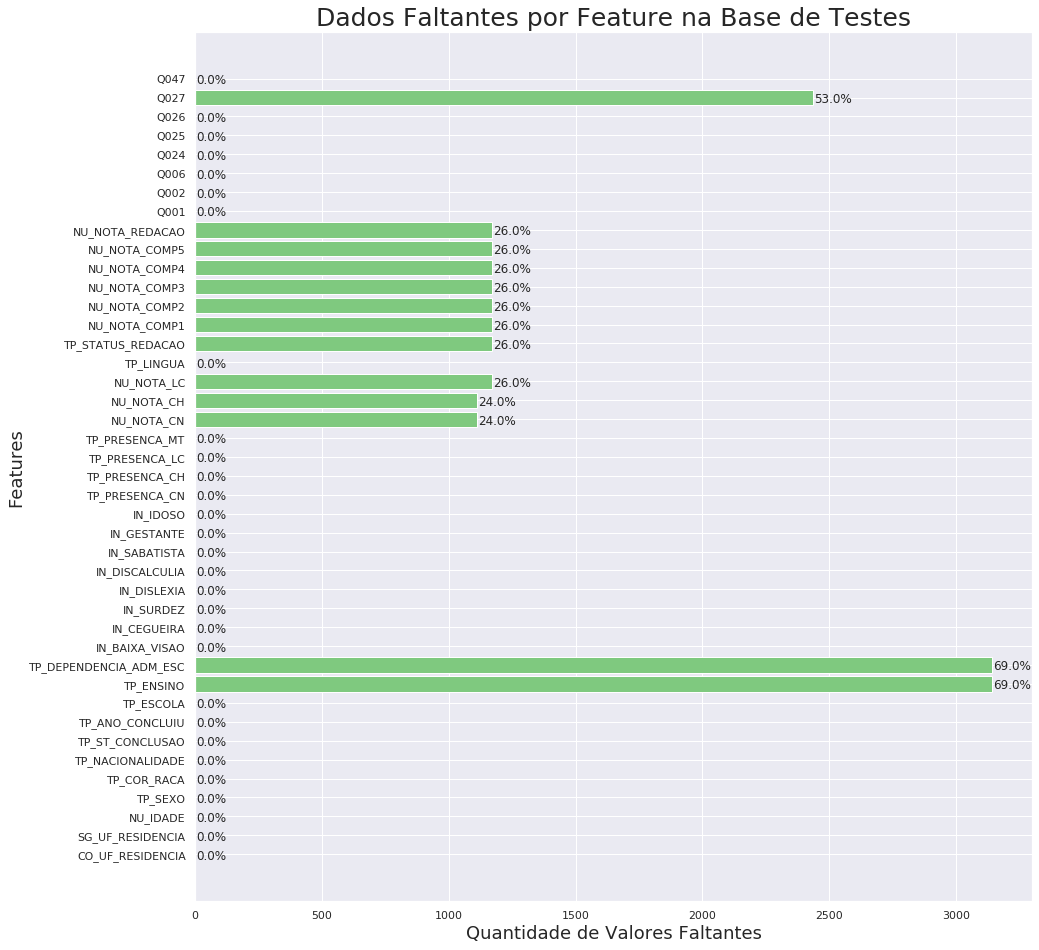

In [13]:
plota_nulos(df_test, "Dados Faltantes por Feature na Base de Testes")

## Missing Values nos Dados de TREINO

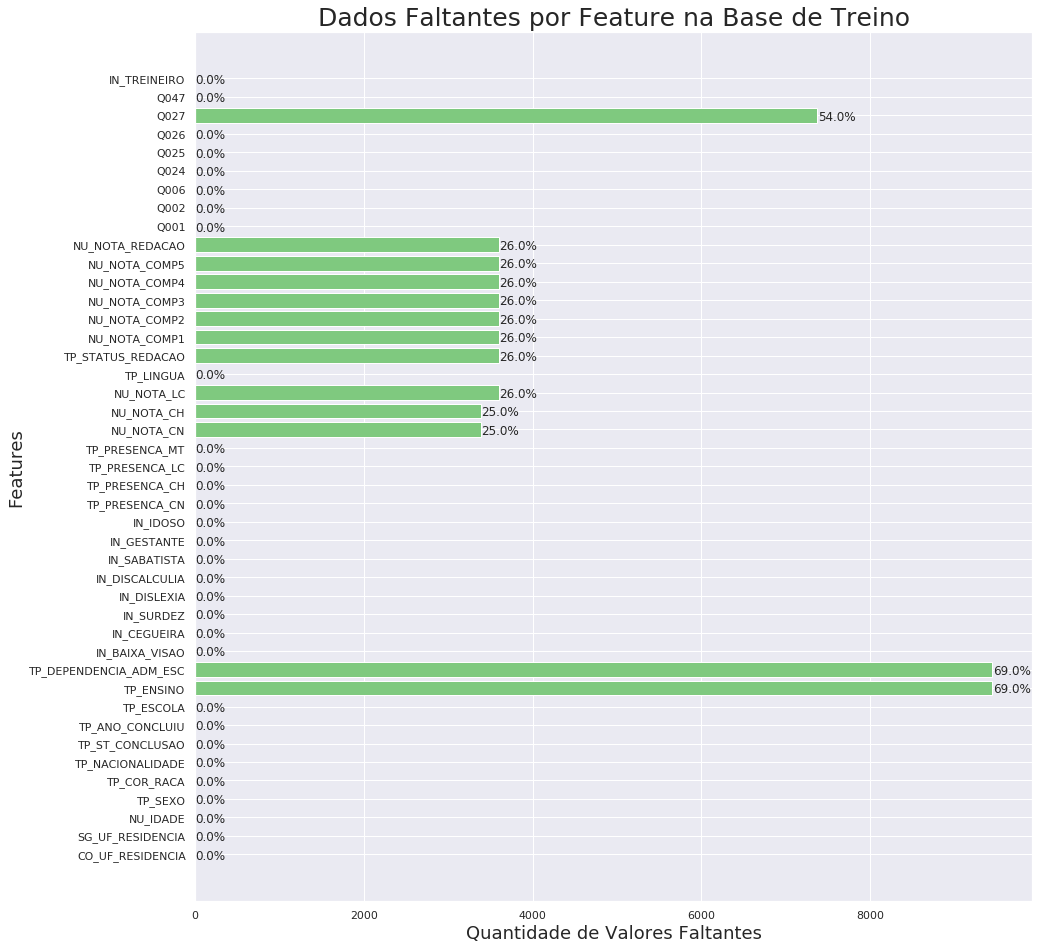

In [14]:
plota_nulos(df_train, "Dados Faltantes por Feature na Base de Treino")

### Conclusões a cerca dos valores faltantes nos dados de treino e teste:
- Não há valores faltantes na nossa variável alvo `IN_TRENEIRO`;
- As features com dados faltantes são exatamente as mesmas nas duas bases de dados e na mesma proporção.

# O que fazer com os valores faltantes?
Este momento é sempre **muito delicado**. Tendo em vista que, qualquer escolha que façamos aqui terá **impacto direto** nos **resultados** do nosso modelo.

Eis o que faremos:
- Vamos `excluir` as features com `mais de 50 %` de dados faltantes. Pois estas não trazem informação signifcante para nosso modelo.

Quanto as features que tiverem menos de 50 % de valores faltantes, podemos utilizar algumas das técnias mais populares para esse tipo de tratamento. Tais como:
>- **Remover** todos os registros com valores faltantes;
- Substituir todos os registros vazios por **zero**;
- Substitituí-los pela **média** ou **mediana** das respectivas features;
- Substituir por alguma forma de **interpolação**;
- Substituir por **(-1)** (Já que este valor está fora do range das nossas variáveis, como foi visto na análise descritiva).

### Nossa escolha:
Muitas variáveis em nosso data set possuem um certo **vínculo**, devido à sua própria natuerza.

**Por exemplo:**
A nota de `Matemática e suas Tecnologias` está, de certa forma, **vinculada** com as notas de `Linguagens e Redação`. Pois todas foram realizadas no mesmo dia. 

> Substituir por **zero**, **média**, **mediana** ou **interpolação**, traria para estes registros valores dentro do range das prórprias features, o que poderia **"confundir"** o nosso modelo, causando assossiações equivocadas.

> Portanto, vamos substituir os dados faltantes por **(-1)** já que, como observado na análise descritiva dos dados, esta constante não pertence ao conjunto de valores possíveis das features. Dessa forma, preservamos o vínculo existente entre algumas das variáveis e não confundimos o modelo imputando valores que possivelmente estejam dentro do range dessas variáveis.


In [15]:
# Excluindo as colunas com mais de 50% de dados faltantes.
df_test.drop(columns=["TP_DEPENDENCIA_ADM_ESC", "TP_ENSINO", "Q027"], inplace=True)
df_train.drop(columns=["TP_DEPENDENCIA_ADM_ESC", "TP_ENSINO", "Q027"], inplace=True)

In [16]:
# Preenchendo os demais valores faltantes com (-1).
df_test.fillna(-1, inplace=True)
df_train.fillna(-1, inplace=True)

In [17]:
# Verificando novamente valores vazios
print(f"Valores vazios ns dados de Teste: {df_test.isna().sum().sum()}")
print(f"Valores vazios ns dados de Treino: {df_train.isna().sum().sum()}")

Valores vazios ns dados de Teste: 0
Valores vazios ns dados de Treino: 0


# Verificando o Balanceamento das Classes (IN_TREINEIRO)

Em muitos problemas de classificação binária é comum que uma das classes preditoras esteja presente em nossos dados em  uma quantidade muito maior do que a outra. Quando isto acontece, dizemos que as classes estão desbalancedas.

Esse fato pode fazer com que nosso modelo fique enviezado e preveja muito mais de uma classe do que da outra.

Como não queremos que nosso modelo sofra com este problema, precisamos verificar se as classes presentes em nosso data set estão balanceadas.

Vamos definir uma função para verificar o balanceamento das classes.

In [18]:
def plota_classes(classe):
    porcentagem_classe_0 = round(classe.value_counts(normalize=True).loc[0] * 100, 1)
    porcentagem_classe_1 = round(classe.value_counts(normalize=True).loc[1] * 100, 1)
    
    sns.countplot(classe)
    plt.title("Balanceamento das Classes", fontsize=25)
    plt.ylabel("Contagem", fontsize=18)
    plt.xlabel("Classes", fontsize=18)
    plt.ylim([0, 13000])
    
    plt.annotate(f"{porcentagem_classe_0} %", (0 - 0.08, classe.value_counts().loc[0] + 50), fontsize=20)
    plt.annotate(f"{porcentagem_classe_1} %", (1 - 0.08, classe.value_counts().loc[1] + 50), fontsize=20)
    plt.grid(True)

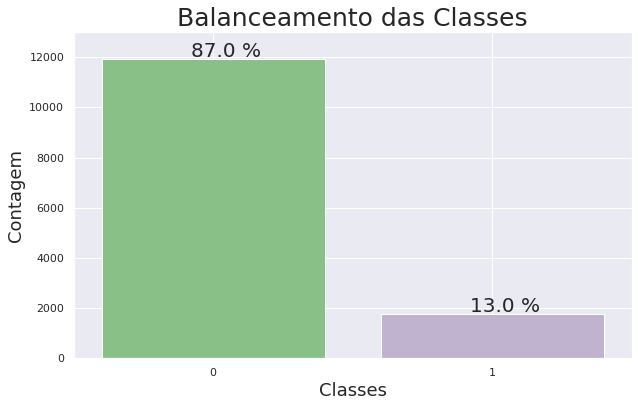

In [19]:
plota_classes(df_train["IN_TREINEIRO"])

Assim podemos ver claramente que a maioria é da classe 0 (não-treineiro).

Precisamos balancear estas classes para não enviezar nosso modelo.

# Balanceando as Classes
Vamos utilizar uma das técnicas mais populares para o balanceamento das classes, o **oversampling**.
Para isto, vamos aplicar o **SMOTE** (do pacote imblearn) para reamostrar os dados da classe minoritária e assim balancear nosso data set.

Contudo, antes iremos separar as `variáveis explicativas` da `variável alvo`.

In [20]:
x_train = df_train.drop(columns="IN_TREINEIRO", errors="ignore")
y_train = df_train["IN_TREINEIRO"]

x_test = df_test.copy()

In [21]:
# Separando as variáveis em categóricas e numéricas.
siglas_categoricas = ["CO", "SG", "TP", "IN", "Q0"]
cat_features = [i for i in x_train.columns if i[:2] in siglas_categoricas]
num_features = x_train.columns.drop(cat_features)

### Encodando as variáveis categóricas com o One-Hot-Enconder.

In [22]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int)

ohe.fit(x_train[cat_features])

x_train_encoded = ohe.transform(x_train[cat_features])
x_test_encoded  = ohe.transform(df_test[cat_features])

x_train_encoded = pd.DataFrame(x_train_encoded, columns=ohe.get_feature_names(cat_features))
x_train_encoded = pd.concat([x_train_encoded, x_train[num_features].reset_index(drop=True)], axis=1)

x_test_encoded = pd.DataFrame(x_test_encoded, columns=ohe.get_feature_names(cat_features))
x_test_encoded = pd.concat([x_test_encoded, x_test[num_features].reset_index(drop=True)], axis=1)


### Aplicando o SMOTE para balancear nossas classes.

In [23]:
smote = SMOTE(sampling_strategy="minority")

x_train_balanceado, y_train = smote.fit_resample(x_train_encoded, y_train)

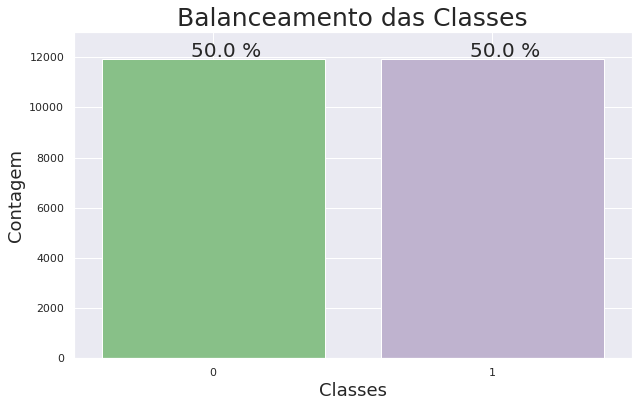

In [24]:
plota_classes(y_train)

 Agora que temos nossas classes balanceadas, podemos criar e treinar nosso modelo para predizer nossas classes.

# Separando os Dados em Treino e Teste

In [25]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x_train_balanceado, y_train, 
                                                       test_size=0.3, random_state=42) 

print(f"Temos {treino_x.shape[0]} dados para treino e {teste_x.shape[0]} para teste.")

Temos 16725 dados para treino e 7169 para teste.


# Seleção de Features com Random Forest
Após todas as etapas de modelagem e reamostragem de dados que fizemos até aqui, nosso Data Frame de treino ficou assim:

In [26]:
x_train_balanceado.head()

,CO_UF_RESIDENCIA_11,CO_UF_RESIDENCIA_12,CO_UF_RESIDENCIA_13,CO_UF_RESIDENCIA_14,CO_UF_RESIDENCIA_15,CO_UF_RESIDENCIA_16,CO_UF_RESIDENCIA_17,CO_UF_RESIDENCIA_21,CO_UF_RESIDENCIA_22,CO_UF_RESIDENCIA_23,...,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,0,0,0,0,0,0,0,0,0,0,...,24,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0
1,0,0,0,0,0,0,0,0,0,1,...,17,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0
2,0,0,0,0,0,0,0,0,0,1,...,21,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0,0,0,0,0,0,0,0,0,0,...,25,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0,0,1,0,0,0,0,0,0,0,...,28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [27]:
print(f"Temos {x_train_balanceado.shape[0]} registros e {x_train_balanceado.shape[1]} colunas.")

Temos 23894 registros e 183 colunas.


Nosso DataFrame de treino agora está com **23.894 registros** após a reamostragem de dados feita com o `SMOTE` e com **183 colunas** após o processo de codificacão das variáveis categóricas feita com o `OneHotEncoder`.

Temos uma quantidade de featrures (colunas) muito elevada para treinar nossos modelos.

Faremos aqui um processo de **feature selection** (seleção de variáveis) com objetivo de reduzir a quantidade de features necessárias para que nosso modelo aprenda a classificar eficientemente as classes do nosso problema.

Para este trabalho podemos fazer uso de diversas técnicas, tais como: `RFE`, `RFECV`, `SelectKBest`, entre outras.

Para selecionar as melhores variáveis preditoras irei utilizar uma **Random Forest** com o atributo `feature_importances_`, da biblioteca [Sckitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_).

In [65]:
# Selecao de Features Utilizando Random Forest.
clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(treino_x, treino_y)

selection_features = pd.DataFrame()
selection_features["features"] = treino_x.columns
selection_features["importancia"] = clf_rf.feature_importances_

selection_features = selection_features[selection_features["importancia"] > np.mean(selection_features["importancia"])].sort_values("importancia", ascending=False)
selection_features.reset_index(drop=True, inplace=True)

treino_x_importance = treino_x[selection_features["features"]]
teste_x_importance = teste_x[selection_features["features"]]
selection_features

,features,importancia
0,TP_ST_CONCLUSAO_3,0.224555
1,NU_IDADE,0.185275
2,TP_ESCOLA_1,0.090483
3,TP_ANO_CONCLUIU_0,0.087363
4,TP_ST_CONCLUSAO_1,0.073042
5,TP_ESCOLA_2,0.057733
6,TP_ST_CONCLUSAO_2,0.049904
7,Q026_B,0.033838
8,Q026_C,0.025289
9,Q026_A,0.018776


Na tabela acima, listamos todas as features cuja a importância para o modelo predizer as classes seja **superior** a **médias das importâcias**.

Só com isto, já conseguimos uma ótima redução de features. Antes tínhamos `183 colunas` e agora temos `apenas 14`.

> Podemos notar aqui, que as features `TP_ST_CONCLUSAO_3` (se o aluno está cursando e concluirá o Ensino Médio após 2016) e  `NU_IDADE` (idade do candidato) possuem uma importâcnia muito superior as demais para o modelo.

Iremos inicialmente trabalhar com todas as 13 features listadas acima e logo após testaremos com apenas as duas primeiras.

In [29]:
features_selected = selection_features["features"].values
features_selected

array(['TP_ST_CONCLUSAO_3', 'NU_IDADE', 'TP_ESCOLA_1',
       'TP_ANO_CONCLUIU_0', 'TP_ST_CONCLUSAO_1', 'TP_ESCOLA_2',
       'TP_ST_CONCLUSAO_2', 'Q026_B', 'Q026_C', 'Q026_A',
       'TP_ANO_CONCLUIU_1', 'Q001_B', 'TP_ST_CONCLUSAO_4', 'TP_SEXO_M'],
      dtype=object)

Depois de todas as etapas de pré-processamento e modelagem dos dados, finalmente estamos prontos para criar e testar nossos modelos de Machine Learning.
# Treinado e Avaliando Modelos

Para avaliar nossos modelos, vamos definir as funções abaixo.

In [30]:
# Definindo a função para plotar a classification report, AUC e a ROC Curve.
def plota_roc_curve(fpr, tpr, predicoes, label):
    plt.title("ROC Curve", fontsize=20)
    plt.ylabel("TPR or Sensitivity", fontsize=20)
    plt.xlabel("FPR or (1 - specificity)", fontsize=20)
    plt.plot(fpr, tpr, label=f"{label}")
    plt.plot([0, 1], [0, 1], ls="--", color="r", label="Sorte")
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.show()
    
    print(classification_report(teste_y, predicoes))
    print(f"AUC: {roc_auc_score(teste_y, predicoes)}")

In [31]:
# Definindo funação que plota a matriz de confusão.
def plot_matriz_confusao(teste_y, predict, title):
    plt.figure(figsize=(6, 6))
    matriz_confusao = confusion_matrix(teste_y, predict)
    sns.heatmap(matriz_confusao, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
    plt.title(f"Matriz de Confusão - {title}", fontsize=20, pad=15)
    plt.xlabel("Previsto", fontsize=20, labelpad=15)
    plt.ylabel("Real", fontsize=20, labelpad=15)
    plt.xticks(ticks=[0.5, 1.5] ,labels=["Não-treineiro", "Treineiro"], fontsize=16)
    plt.yticks(ticks=[0.25 , 1.25] ,labels=["Não-treineiro", "Treineiro"], fontsize=16)
    plt.show()

## Random Forest

In [52]:
features_selected[:-1]

array(['TP_ST_CONCLUSAO_3', 'NU_IDADE', 'TP_ESCOLA_1',
       'TP_ANO_CONCLUIU_0', 'TP_ST_CONCLUSAO_1', 'TP_ESCOLA_2',
       'TP_ST_CONCLUSAO_2', 'Q026_B', 'Q026_C', 'Q026_A',
       'TP_ANO_CONCLUIU_1', 'Q001_B', 'TP_ST_CONCLUSAO_4'], dtype=object)

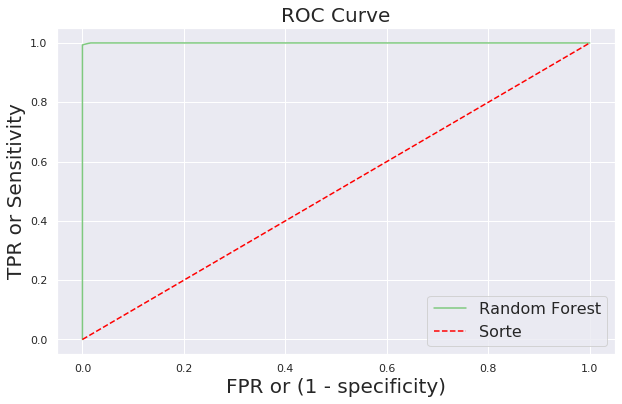

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3563
           1       1.00      0.99      1.00      3606

    accuracy                           1.00      7169
   macro avg       1.00      1.00      1.00      7169
weighted avg       1.00      1.00      1.00      7169

AUC: 0.9965335551858014


In [54]:
clf_rf.fit(treino_x[features_selected[:-1]], treino_y)
predict_rf = clf_rf.predict(teste_x[features_selected[:-1]])

y_score_rf = clf_rf.predict_proba(teste_x[features_selected[:-1]])[:,1]
fpr, tpr, treshold = roc_curve(teste_y, y_score_rf)

plota_roc_curve(fpr, tpr, predict_rf, "Random Forest")

Temos aqui algumas métricas importantes.

O valor de métrica `AUC` (area under the curve) está muito próximo de 1, máximo valor possível.
Quanto mais próximo de 1, melhor o poder de predição do nosso modelo.

Esta acurácia está muito boa, principalmente se compararmos a curva em verde referente ao nosso modelo (Rando Forest) com a curva tracejada em vermelho referente a uma classificação feita com base na sorte "chute".

Logo, a **Random Forest** se ajustou muito bem aos dados de teste.

Vamos analisar a `matriz de confusão` deste modelo.

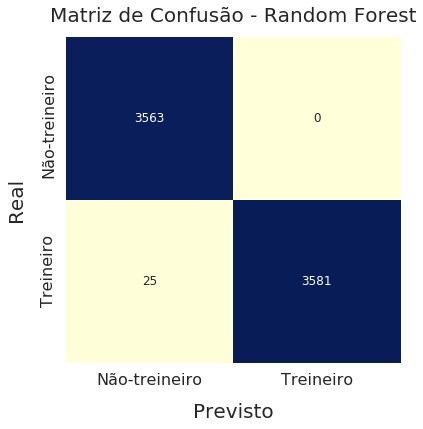

In [55]:
plot_matriz_confusao(teste_y, predict_rf, "Random Forest")

Nosso modelo não cometeu nenhum `erro do tipo 1` (**Falsos positivos**). Isto quer dizer que o modelo não classificou nenhum candidato como treineiro quando na verdade o mesmo não era.

Porém, tivemos **25 falsos negativos** `erro do tipo 2`. Ou seja, nosso modelo classificou 23 canditatos como sendo pertencentes à classe `não-treineiro`, quando na verdade os mesmo eram `treineiros`.


Vamos agora avaliar outros modelos para fazermos nossa escolha.

# SGDClassifier - Stochastic Gradient Descent 

In [70]:
clf_SGD = SGDClassifier()
clf_SGD.fit(treino_x[features_selected], treino_y)
predict_SGD = clf_SGD.predict(teste_x[features_selected])

y_score = clf_SGD.decision_function(teste_x[features_selected])
fpr, tpr, _ = roc_curve(teste_y, y_score)

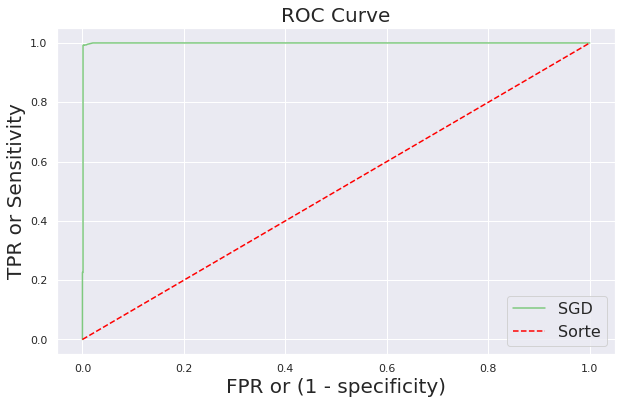

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3563
           1       1.00      0.99      1.00      3606

    accuracy                           1.00      7169
   macro avg       1.00      1.00      1.00      7169
weighted avg       1.00      1.00      1.00      7169

AUC: 0.9951352635369778


In [72]:
plota_roc_curve(fpr, tpr, predict_SGD, "SGD")

Nosso modelo `SGD` também se saiu muito bem.
Seu `auc` foi de `0.9951
` muito próximo do valor alcançado pela Random Forest.

Vamos verificar a matriz de confusão para este modelo.

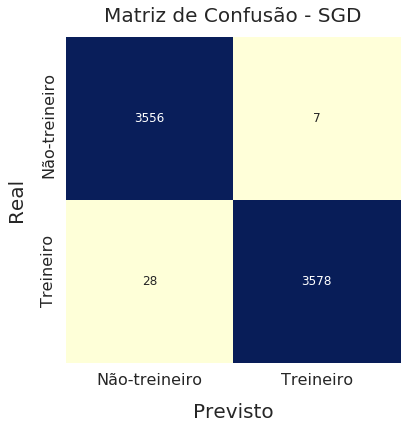

In [74]:
plot_matriz_confusao(teste_y, predict_SGD, "SGD")

O SGD Classifier teve `7 falsos negativos` e `28 falsos positivos`.
Vamos seguir avaliando outros modelos:

# Logistic Regression 

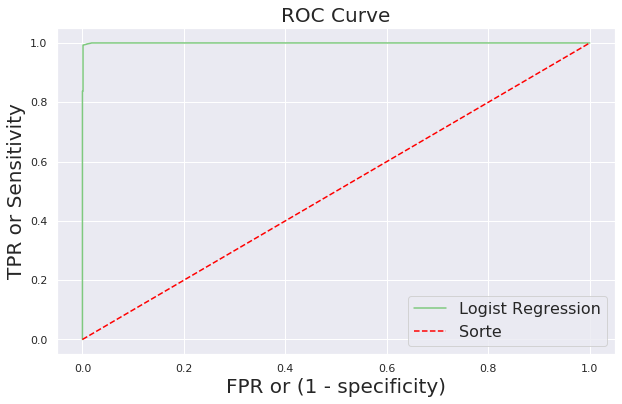

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3563
           1       1.00      0.99      1.00      3606

    accuracy                           1.00      7169
   macro avg       1.00      1.00      1.00      7169
weighted avg       1.00      1.00      1.00      7169

AUC: 0.9959722304594473


In [75]:
clf_LR = LogisticRegression()
clf_LR.fit(treino_x[features_selected], treino_y)
predict_LR = clf_LR.predict(teste_x[features_selected])

y_score_LR = clf_LR.predict_proba(teste_x[features_selected])[:,1]
fpr, tpr, threshold = roc_curve(teste_y, y_score_LR)
plota_roc_curve(fpr, tpr, predict_LR, "Logist Regression")

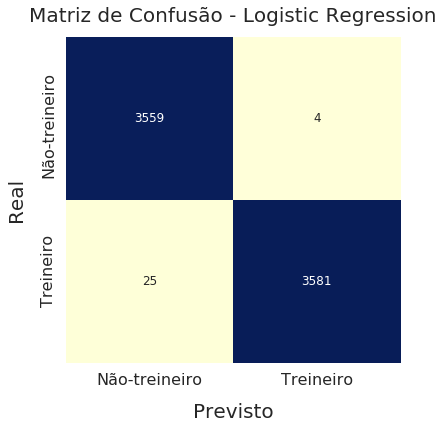

In [76]:
plot_matriz_confusao(teste_y, predict_LR, "Logistic Regression")

# KNeighborsClassifier

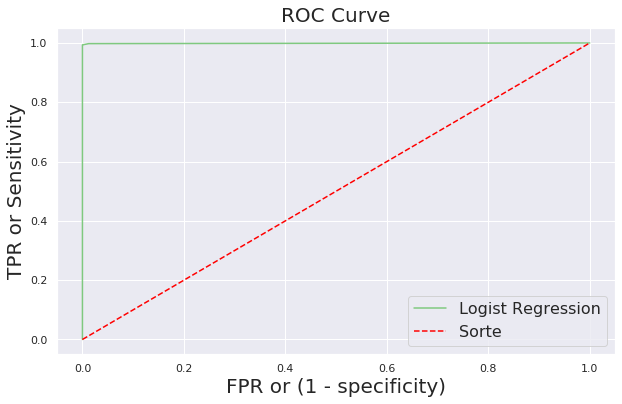

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3563
           1       1.00      0.99      1.00      3606

    accuracy                           1.00      7169
   macro avg       1.00      1.00      1.00      7169
weighted avg       1.00      1.00      1.00      7169

AUC: 0.9968075239928961


In [78]:
clf_KNN = KNeighborsClassifier(7)
clf_KNN.fit(treino_x[features_selected], treino_y)
predict_KNN = clf_KNN.predict(teste_x[features_selected])

y_score_KNN = clf_KNN.predict_proba(teste_x[features_selected])[:,1]
fpr, tpr, threshold = roc_curve(teste_y, y_score_KNN)
plota_roc_curve(fpr, tpr, predict_KNN, "Logist Regression")

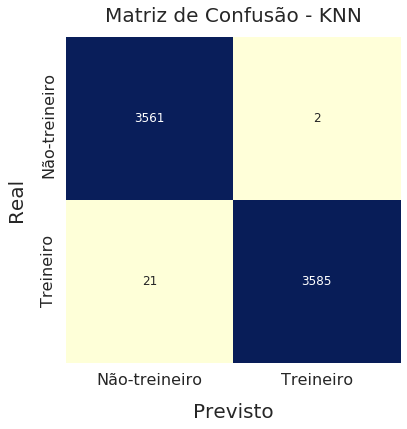

In [79]:
plot_matriz_confusao(teste_y, predict_KNN, "KNN")

# SVC - Support Vector Classification
Este modelo é muito sensível à escala dos dados.
Vamos então padronizar os dados com os quais alimentaresmo ele.

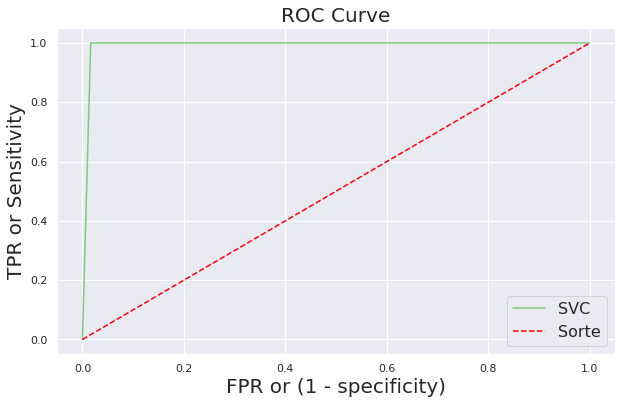

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3563
           1       0.98      1.00      0.99      3606

    accuracy                           0.99      7169
   macro avg       0.99      0.99      0.99      7169
weighted avg       0.99      0.99      0.99      7169

AUC: 0.9918607914678641


In [80]:
scaler = StandardScaler()
treino_x_standard = scaler.fit_transform(treino_x[features_selected])
teste_x_standard = scaler.transform(teste_x[features_selected])

clf_svm = SVC()
clf_svm.fit(treino_x_standard, treino_y)
predict_svm = clf_svm.predict(teste_x_standard)

y_score_svm = clf_svm.decision_function(teste_x_standard)
fpr, tpr, threshold = roc_curve(teste_y, predict_svm)
plota_roc_curve(fpr, tpr, predict_svm, "SVC")

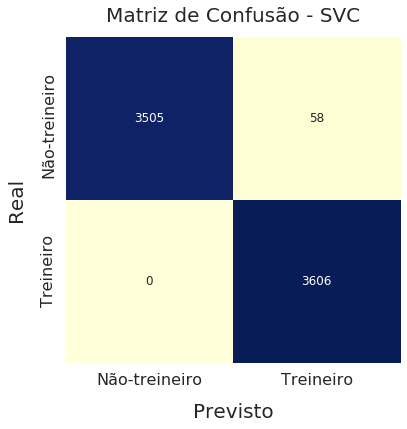

In [81]:
plot_matriz_confusao(teste_y, predict_svm, "SVC")


# GradientBoostingClassifier

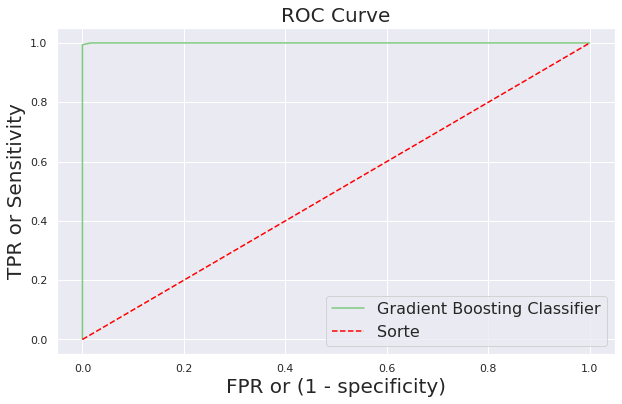

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3563
           1       1.00      0.99      1.00      3606

    accuracy                           1.00      7169
   macro avg       1.00      1.00      1.00      7169
weighted avg       1.00      1.00      1.00      7169

AUC: 0.9965335551858014


In [82]:
clf_GBC = GradientBoostingClassifier()
clf_GBC.fit(treino_x[features_selected], treino_y)
predict_GBC = clf_GBC.predict(teste_x[features_selected])

y_score_GBC = clf_GBC.predict_proba(teste_x[features_selected])[:,1]
fpr, tpr, threshold = roc_curve(teste_y, y_score_GBC)
plota_roc_curve(fpr, tpr, predict_GBC, "Gradient Boosting Classifier")

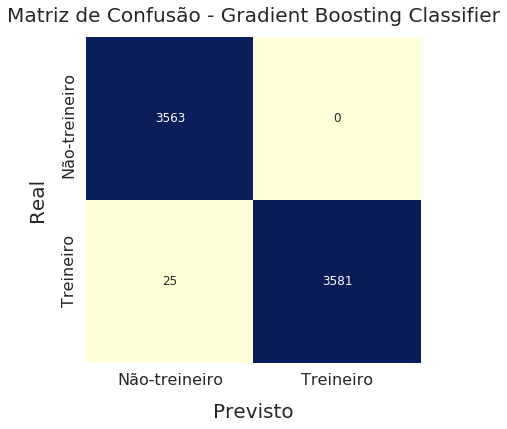

In [83]:
plot_matriz_confusao(teste_y, predict_GBC, "Gradient Boosting Classifier")

Este modelo obteve resultados idênticos ao da Random Forest.

# Qual Modelo Escolher?
Analisando os resultados dos testes de todos os modelos, concluimos que uma vez que os dados estejam ajustados a diferença de performance dos modelos foi praticamente nula. 

Lembrando a velha máxima:
> "A qualidade dos dados que você usa é mais importante do que a complexidade dos modelos que você treina."

» **Mario Filho** (Cientista de Dados)

Optei trabalhar com a **Random Forest** por ser um modelo Robusto, geralmente eficiente neste tipo de problema de classifação e também pelo fato de que neste modelo as variáveis numéricas não precisam ser pré-processadas (normalizar ou padronizar, nesse caso).

# Submetendo os Resultados na Plataforma da Codenation
Agora que já temos nossos `dados ajustados` e `modelo escolhido`, vamos testar nosso modelo com os dados do aquivo `test.csv` e submeter os resultados obtidos pelo mesmo à plataforma da **Codenation**.

In [86]:
clf_RF = RandomForestClassifier(random_state=42)
clf_RF.fit(treino_x[features_selected], treino_y)
predict = clf_RF.predict(x_test_encoded[features_selected])

predict = pd.Series(predict, name="IN_TREINEIRO")
df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict], axis=1)
answer.to_csv("answer.csv", index=False)
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


# Resultado
Após enviar nossas predições para a plaforma tivemos o seguinte resultado reportado pela plataforma:

**Score:** `99.7374 %`

> Isto quer dizer que nosso modelo conseguiu `acertar 99.7374 %` das suas predições!!!
**Nada mal, para algumas árvores.**

Agora que já alcançamos um excelente resultado,  vamos tentar manter o score, porém, reduzindo ainda mais o número de features necessárias para o modelo. 

**Será que isso é possível?**

Vamos investigar...

# Reduzindo ainda mais as Features

In [87]:
selection_features

,features,importancia
0,TP_ST_CONCLUSAO_3,0.224555
1,NU_IDADE,0.185275
2,TP_ESCOLA_1,0.090483
3,TP_ANO_CONCLUIU_0,0.087363
4,TP_ST_CONCLUSAO_1,0.073042
5,TP_ESCOLA_2,0.057733
6,TP_ST_CONCLUSAO_2,0.049904
7,Q026_B,0.033838
8,Q026_C,0.025289
9,Q026_A,0.018776


Esse foi o resultado que obtivemos lá na etapa de feature selection.

Esta tabela contém as features com maior importância para a predição do modelo.

Analisando a tabela com atenção, notamos que as duas primeiras features `TP_ST_CONCLUSAO_3` e `NU_IDADE`, possuem um importância muito superior as demais para a predição do nosso modelo.

Vamos então rodar novamente o nosso modelo, porém, agora somente com estas duas features.

Valhe lembrar aqui, como estão os nosso dados de treino.

In [111]:
treino_x[features_selected]

,TP_ST_CONCLUSAO_3,NU_IDADE,TP_ESCOLA_1,TP_ANO_CONCLUIU_0,TP_ST_CONCLUSAO_1,TP_ESCOLA_2,TP_ST_CONCLUSAO_2,Q026_B,Q026_C,Q026_A,TP_ANO_CONCLUIU_1,Q001_B,TP_ST_CONCLUSAO_4,TP_SEXO_M
1514,1,16,1,1,0,0,0,0,0,1,0,0,0,0
18379,1,17,1,1,0,0,0,0,0,1,0,0,0,0
9742,1,15,1,1,0,0,0,0,0,1,0,0,0,1
3693,1,17,1,1,0,0,0,0,0,1,0,0,0,0
8704,0,20,0,1,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1,16,1,1,0,0,0,0,0,1,0,0,0,0
5390,0,33,1,0,1,0,0,0,0,1,0,1,0,0
860,0,20,1,0,1,0,0,0,1,0,0,0,0,1
15795,1,16,1,1,0,0,0,0,0,1,0,0,0,0


Estamos trabalhando com 14 features até aqui.

Vamos reduzir para apenas as duas features mais importantes para o modelo.

In [88]:
features_selected_2 = ["TP_ST_CONCLUSAO_3", "NU_IDADE"]

clf_RF.fit(treino_x[features_selected_2], treino_y)
predict = clf_RF.predict(x_test_encoded[features_selected_2])

predict = pd.Series(predict, name="IN_TREINEIRO")
df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict], axis=1)
answer.to_csv("answer.csv", index=False)
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


# Resultado
Após enviar nossas predições para a plaforma tivemos o seguinte resultado reportado pela plataforma:

**Score:** `99.7374 %`

> Este **resultado é espetacular!!!** Conseguimos manter o `Score elevado`, ao ponto que `reduzimos para apenas 2` as features necessárias para nosso modelo realizar tal feito!

# Como nosso modelo "Pensou"?
Nosso modelo é composto por várias árvores de decisão. Faremos uso de apenas uma com obejtivo de elucidar as razões das decisões tomadas por nosso modelo.

In [96]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(treino_x[features_selected_2], treino_y)

DecisionTreeClassifier(random_state=42)

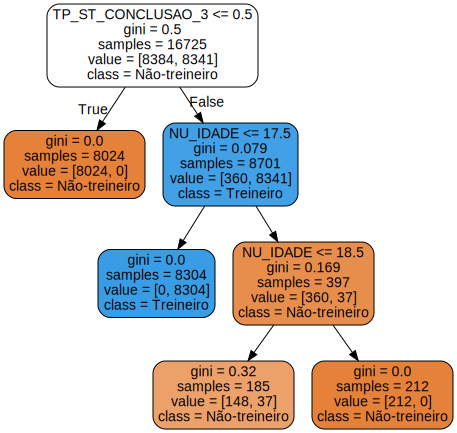

In [109]:
dot = export_graphviz(
                    modelo,
                    out_file=None,
                    feature_names=treino_x[features_selected_2].columns,
                    class_names=["Não-treineiro", "Treineiro"],
                    rounded=True,
                    filled=True
                    )

grafico = graphviz.Source(dot)
grafico.

O diagrama acima nos mostra as condições que foram avaliadas pelo nosso modelo e as ramificações de tais resultados.

Quanto mais clara a cor `"caixa"`, menos certeza o modelo tem. Quanto mais azul, mais certeza o modelo tem de que se trata de um `treineiro`. Por outro lado, quanto mais laranja, mais certeza de que trata-se de um `não-treineiro`. Caso contrário, ele vai avaliar se a `idade` da pessoa é menor ou igual a 17.5. Caso essa condição seja verdadeira o modelo já classifica o mesmo como treineiro e assim sucessivamente.

Como podemos notar, se a variável `TP_ST_CONCLUSAO_3` for menor ou igual 0.5 o nosso modelo já classifica o mesmo como **não-treineiro**, o que algo intuitivo de se pensar pois esta variável nos diz se o canidato está concluindo o  

# Conclusão

Percebemos ao longo de todo o processo que, uma vez que tratamos e selecionamos os dados, os modelos que testamos apresentaram performances muito semelhantes. Optamos por seguir com a Random Forest, embora ou outros modelos testados tenham apresentado potencial igualmente capaz para resolver o probelma.

Obtivemos um `Score de 99.7374 %` utilizando a **Random Forest** e as **14 features** que selecionamos como sendo as mais importantes para a predição na etapa de feature selection.

Em seguida, tentamos reduzir ainda mais as features disponíveis sem comprometer o score. E conseguimos!

Após observarmos que as features mais importantes para predição são `TP_ST_CONCLUSAO_3` e `NU_IDADE`, e ambas possuem uma importãncia muito superior as demais. Utilizamos apenas estas para alimentar nosso modelo.


E o **resultado foi surpreendente!** Conseguimos manter o `Score elevado` **99.7374 %**, ao ponto que `reduzimos para apenas 2` as features necessárias para nosso modelo realizar tal feito!

Portanto, após todos os processos de análise descritiva, pré-processamento dos dados, modelagem, treino e avaliação de modelos conseguimos reduzir de **183 variáveis** para **apenas 2** com o `score final de 99.7374 %`.

# Referências

- [Classification: Basic Concepts, Decision Trees, and Model Evaluation](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf)
- [Having an Imbalanced Dataset? Here Is How You Can Fix It](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb)
- [Foundations of Imbalanced Learning](https://pdfs.semanticscholar.org/1678/7e213ed0a5c0cf9baabdb45f9df631248a91.pdf)
- [Data Mining for Imbalanced Datasets: An Overview](https://www3.nd.edu/~dial/publications/chawla2005data.pdf)
- [Classification: Basci Concepts, Decision Trees, and Model Evaluation](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf)
- [Documentação do módulo SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)